In [2]:
import stream as st
st.__version__

'1.0'

In [3]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [4]:
adata=st.read(file_name='../datasets/HSC/mat.tsv.gz',workdir='./result_atac')

Saving results in: ./result_atac


In [4]:
adata

AnnData object with n_obs × n_vars = 2034 × 465536 
    uns: 'workdir'

In [7]:
st.add_cell_labels(adata,file_name='../datasets/HSC/cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='../datasets/HSC/cell_label_color.tsv.gz')

In [8]:
st.cal_qc(adata,assay='atac')

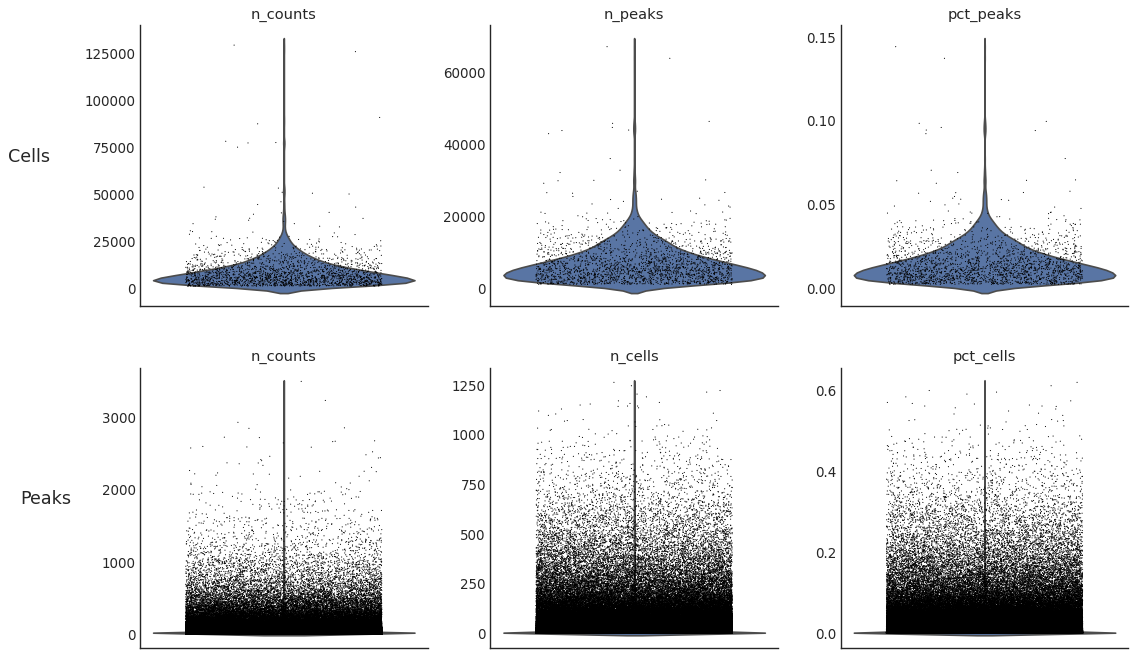

In [12]:
st.plot_qc(adata,jitter=0.3)

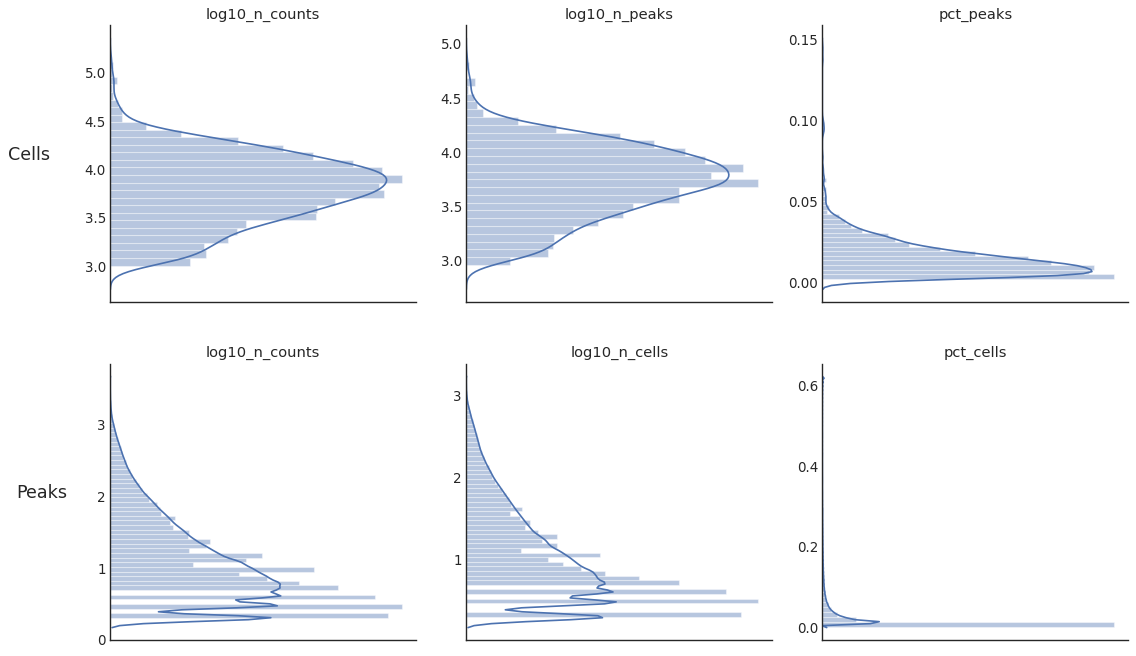

In [9]:
st.plot_qc(adata,log_scale=[0,1,3,4],hist_plot=range(6),jitter=0.3)

Здесь необходимо отобрать пороги из QC

In [10]:
st.filter_cells(adata, min_n_features=100)
st.filter_features(adata, min_n_cells=20)

filter cells based on min_n_features
after filtering out low-quality cells: 
2034 cells, 465536 peaks
Filter peaks based on min_n_cells
After filtering out low-expressed peaks: 
2034 cells, 126719 peaks


In [11]:
adata

AnnData object with n_obs × n_vars = 2034 × 126719 
    obs: 'label', 'n_counts', 'n_peaks', 'pct_peaks'
    var: 'n_counts', 'n_cells', 'pct_cells'
    uns: 'workdir', 'label_color', 'assay'

Используем бинаризацию и превращаем данные в формат TF-IDF

In [12]:
adata.X[adata.X>0] = 1 ###binarization
st.normalize(adata,method='tf_idf')

using all the features ...
50 PCs are selected


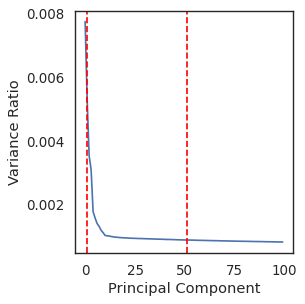

In [13]:
st.select_top_principal_components(adata,first_pc=False,n_pc=50)

Выполняем сокращение размерности. Траектория строится по внутреннему представлению данных scATACseq (PCA/tsne)

In [14]:
st.dimension_reduction(
    adata,
    method='se',
    feature='top_pcs',
    n_components=5,
    n_neighbors=100,
    n_jobs=16
)

feature top_pcs is being used ...
16 cpus are being used ...


Смотрим на кластеры

**Упражнение** Выполните сокращение размерности на полной матрице (без QC). Сравните результаты кластеризации

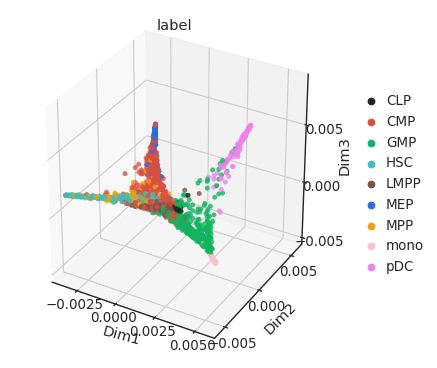

In [15]:
st.plot_dimension_reduction(
    adata,color=['label'],
    show_graph=False,
    show_text=False
)

Выполняем проекцию в 2D

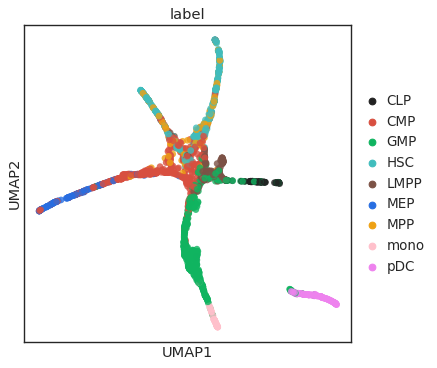

In [16]:
st.plot_visualization_2D(
    adata,
    n_neighbors=100,
    color=['label'],
    use_precomputed=False
)

## Получаем траектории

In [17]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 6


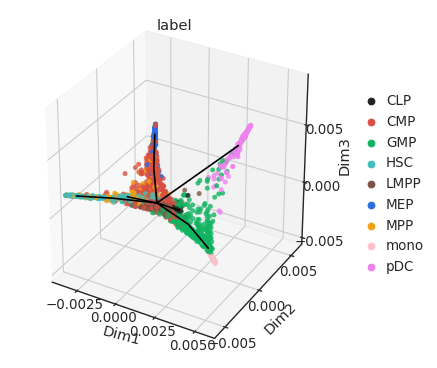

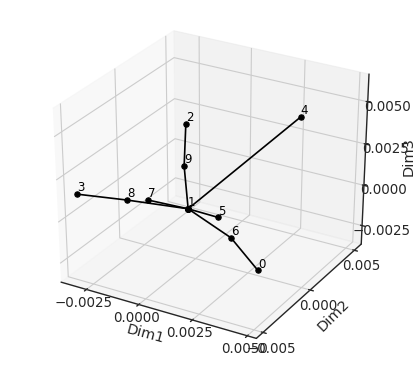

In [18]:
st.plot_dimension_reduction(adata,color=['label'],show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

In [19]:
st.elastic_principal_graph(
    adata,
    epg_alpha=0.01,
    epg_mu=0.05,
    epg_lambda=0.01
)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2034 points and 5 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|0|1||50
	
1.261e-06
	
50
	
49
	
42
	
1
	
0
	
0
	
5.763e-07
	
5.045e-07
	
0.9792
	
0.9818
	
5.566e-07
	
1.277e-07
	
6.385e-06
	
0.0003193
	
0


33.039 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


Выводим граф с указанием ветки развития

Importing precomputed umap visualization ...


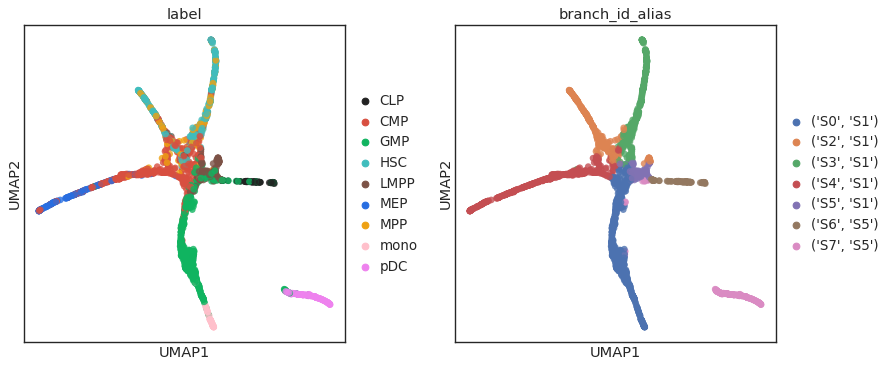

In [20]:
st.plot_visualization_2D(
    adata,n_neighbors=100,
    color=['label','branch_id_alias'],
    fig_ncol=4
)

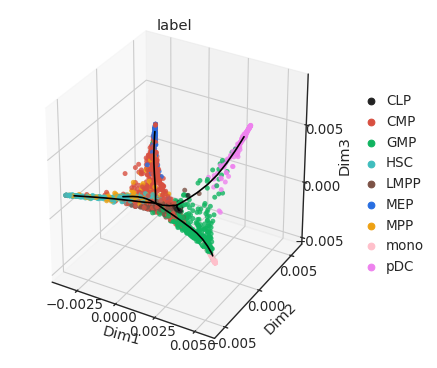

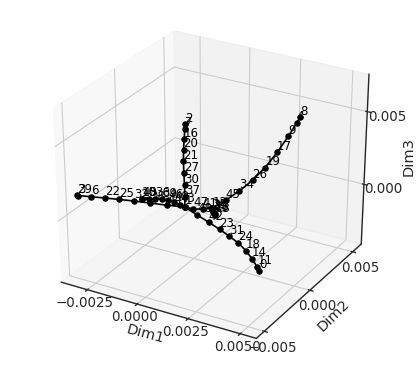

In [29]:
st.plot_dimension_reduction(adata,color=['label'],show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

Продлеваем пути к дальним клеткам

Extending leaves with additional nodes ...
Number of branches after extending leaves: 7


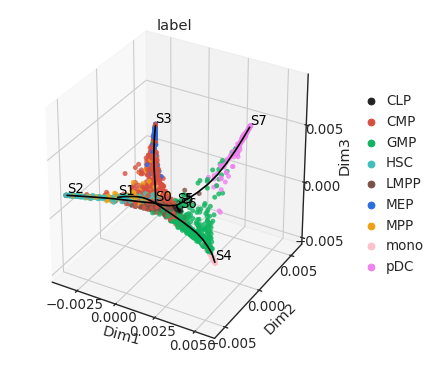

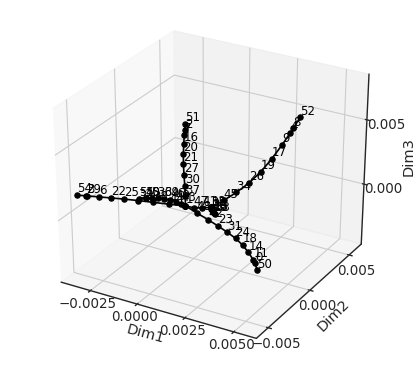

In [22]:
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid', epg_ext_par=0.8)
st.plot_dimension_reduction(adata, color=['label'], show_graph=True, show_text=True)
st.plot_branches(adata, show_text=True)

HSC - ветвь S2. Посмотрим на траектории развития

## Смотрим на траектории

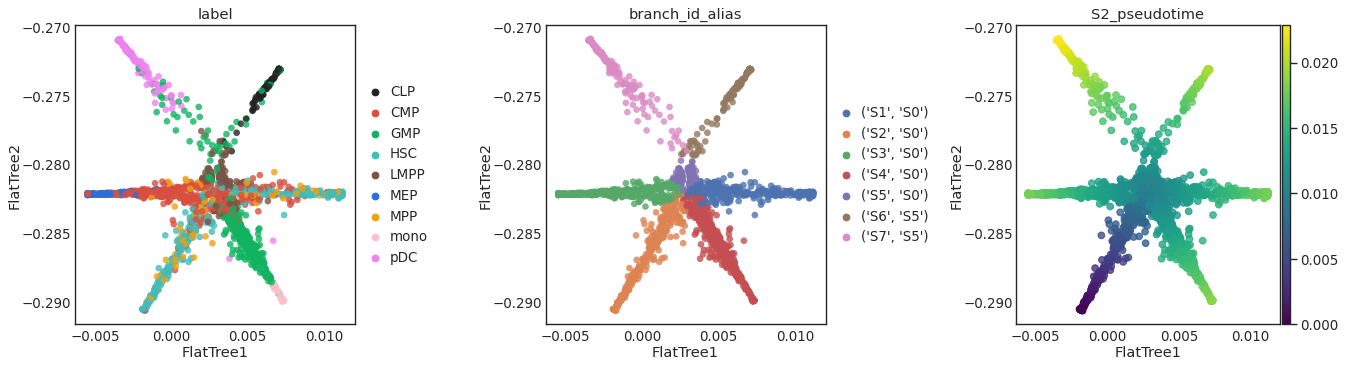

In [23]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S2_pseudotime'],
                  dist_scale=0.5,show_graph=False,show_text=False)

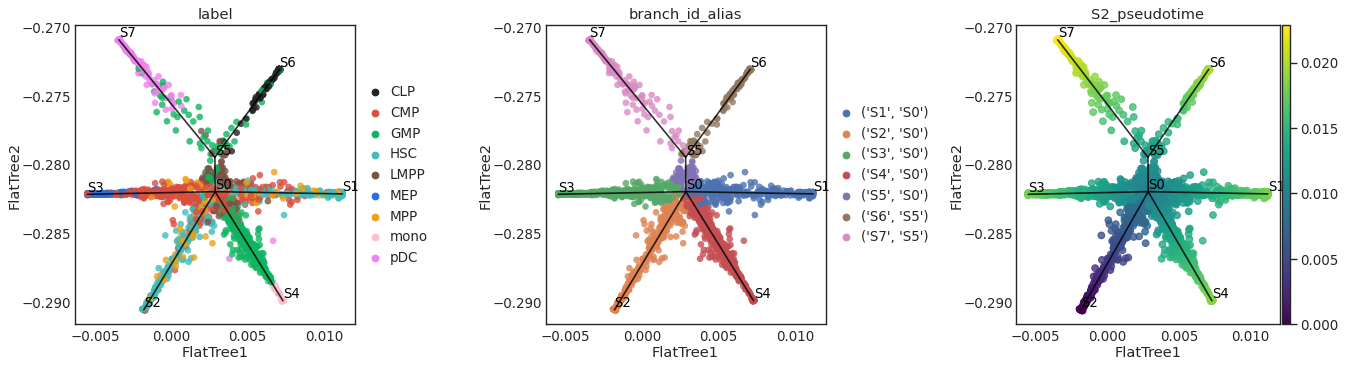

In [24]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S2_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

Посмотрим, как эволюционирует ветвь HSC

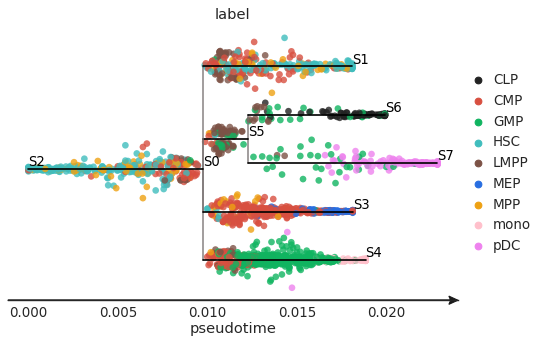

In [25]:
st.plot_stream_sc(adata,root='S2',color=['label'],
                  dist_scale=0.5,show_graph=True,show_text=True)

Смотрим на пропорции переходов в разных типах клеток

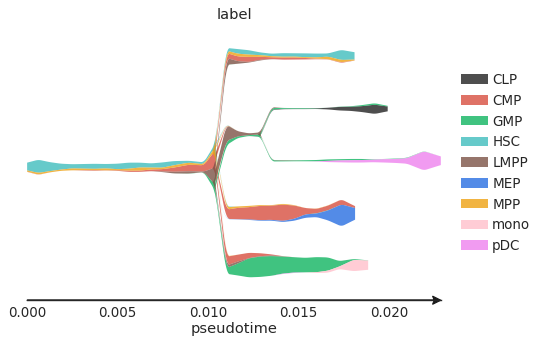

In [26]:
st.plot_stream(adata,root='S2',color=['label'])

## Выделяем значимые пики

In [27]:
st.detect_leaf_markers(
    adata,marker_list=adata.var[adata.var['pct_cells']>0.1].index[:1000],
    cutoff_zscore=1.0,cutoff_pvalue=0.01,
    root='S1',
    n_jobs=16
)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
16 cpus are being used ...
1000 markers are being scanned ...


In [28]:
adata.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S0S2_pvalue,S5S6_pvalue,S5S7_pvalue,S0S3_pvalue,S0S4_pvalue
chr1_153316244_153316744,1.99543,208.943,3.46483e-43,7.50054e-16,6.0345e-13,1.55844e-17,5.79801e-24,1,2.31817e-39
chr1_22192536_22193036,2.11995,208.23,4.92492e-43,3.18796e-37,5.91293e-40,1.49564e-24,1,2.71929e-26,1.44069e-24
chr1_43429184_43429684,1.91797,182.744,1.38784e-37,2.50462e-19,8.47747e-10,7.2495e-14,4.73132e-08,1,1.13027e-37
chr1_21620867_21621367,2.00705,175.209,5.64079e-36,3.03839e-27,1.72508e-20,1.82425e-10,1,3.08267e-34,5.81846e-14
chr1_59221069_59221569,1.9805,172.563,2.07057e-35,7.72735e-12,1,8.15814e-20,3.42885e-25,2.75201e-23,9.65561e-25


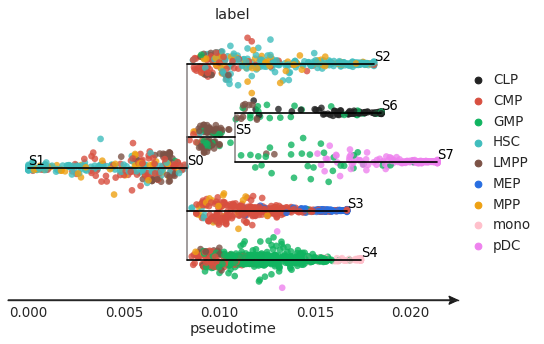

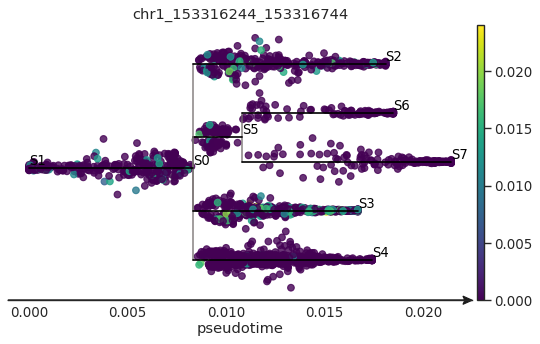

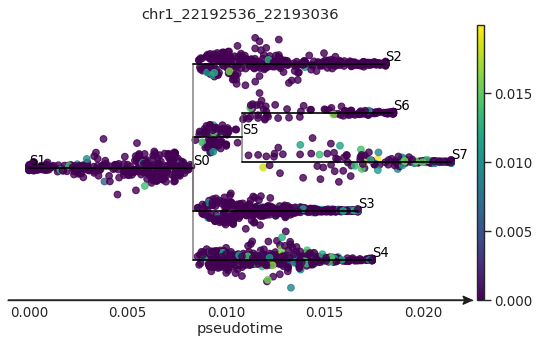

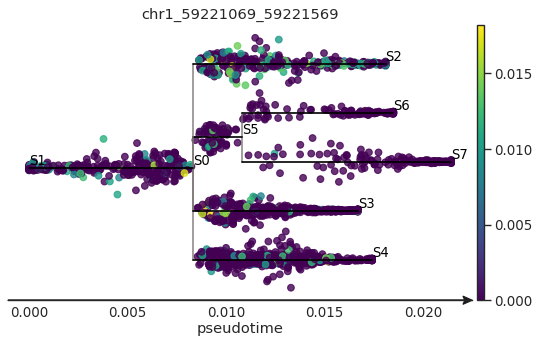

In [29]:
st.plot_stream_sc(
    adata,
    root='S1',
    color=['label','chr1_153316244_153316744','chr1_22192536_22193036','chr1_59221069_59221569'],
    dist_scale=0.5,
    show_graph=True,
    show_text=True
)

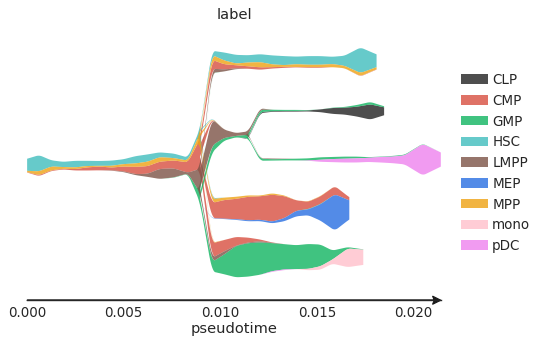

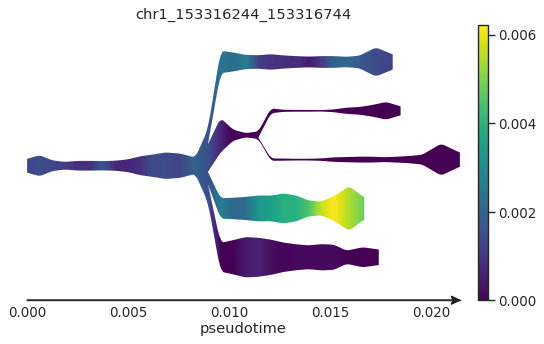

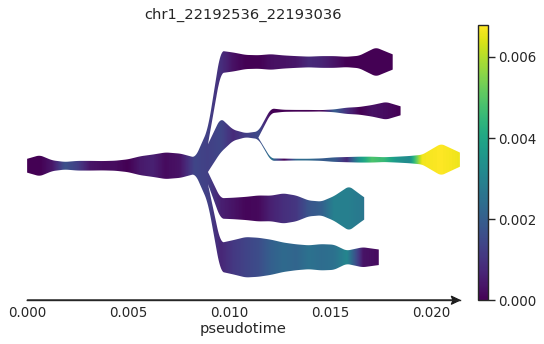

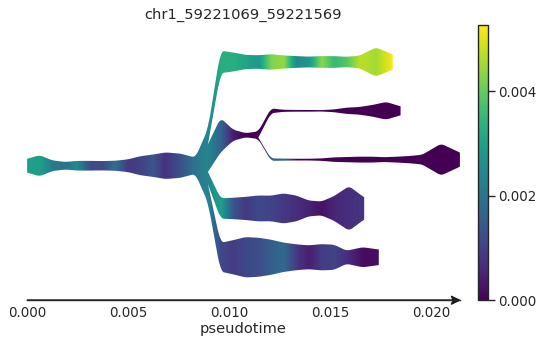

In [30]:
st.plot_stream(
    adata,
    root='S1',
    color=['label','chr1_153316244_153316744','chr1_22192536_22193036','chr1_59221069_59221569'],
    dist_scale=1.5
)

# Анализируем мотивы для TF

In [31]:
import stream_atac

Запускаем chromVAR, чтобы получить матрицу (клетка x мотив)

In [32]:
adata = stream_atac.preprocess_atac(
    file_count='../datasets/HSC/count_file.tsv.gz',
    file_region='../datasets/HSC/region_file.bed.gz',
    file_sample='../datasets/HSC/sample_file.tsv.gz',
    genome = 'hg19',
    feature='motif',
    workdir='./motif_result', n_jobs=16, experiment='atac-seq'
)

Saving results in: ./motif_result
Running chromVAR pipeline ...


In [33]:
st.add_cell_labels(adata,file_name='../datasets/HSC/cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='../datasets/HSC/cell_label_color.tsv.gz')

using all the features ...
50 PCs are selected


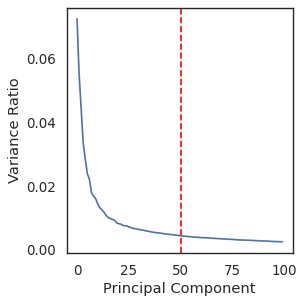

In [34]:
st.select_top_principal_components(adata,n_pc=50,first_pc=True)

In [35]:
st.dimension_reduction(adata, method='se', feature='top_pcs', n_components=5, n_neighbors=30, n_jobs=16)

feature top_pcs is being used ...
16 cpus are being used ...


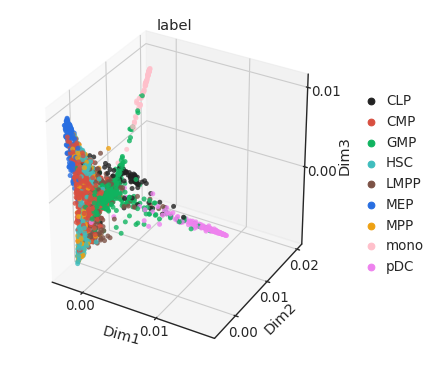

In [36]:
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=False,show_text=False,plotly=False)

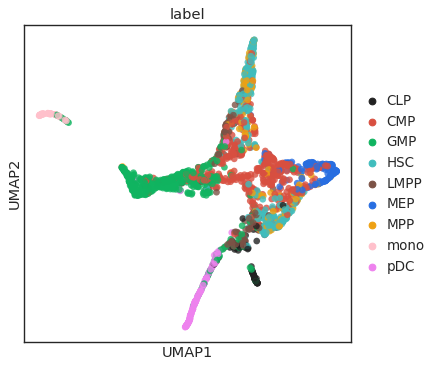

In [37]:
st.plot_visualization_2D(adata,n_neighbors=100,color=['label'],use_precomputed=False)

In [38]:
st.seed_elastic_principal_graph(adata,n_clusters=10,use_vis=True)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 5


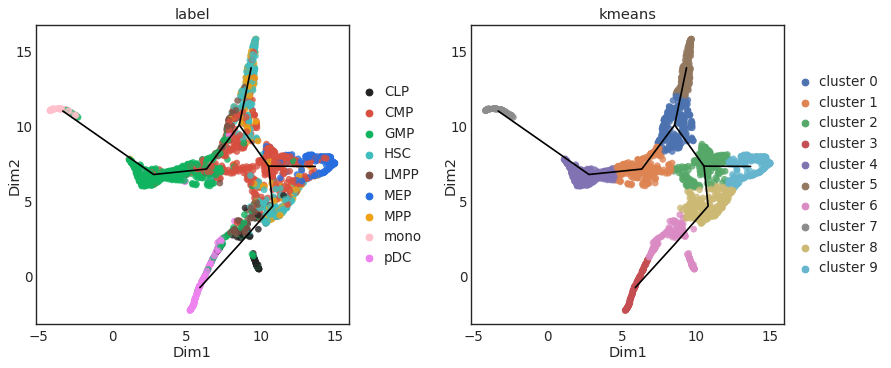

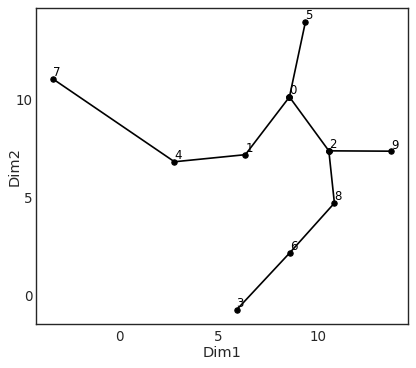

In [39]:
st.plot_dimension_reduction(adata,color=['label','kmeans'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

In [40]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.01)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2034 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||50
	
0.7324
	
50
	
49
	
44
	
2
	
0
	
0
	
0.3511
	
0.307
	
0.9875
	
0.9891
	
0.3239
	
0.05733
	
2.867
	
143.3
	
0


16.897 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


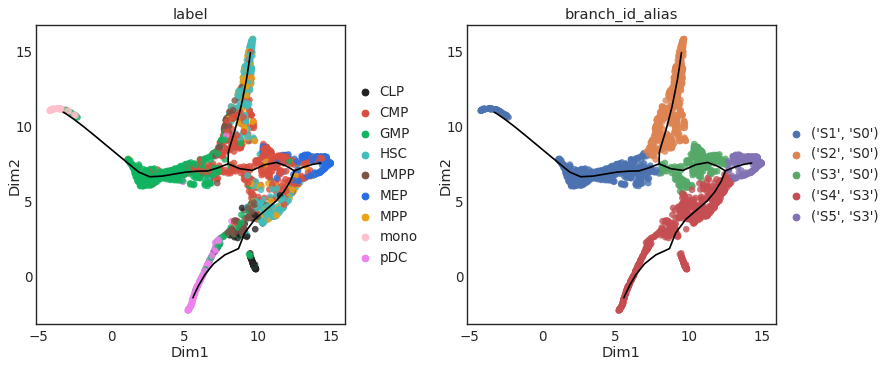

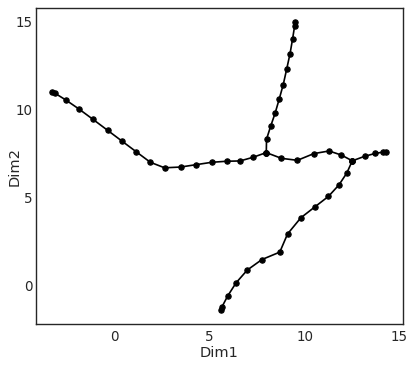

In [41]:
st.plot_dimension_reduction(
    adata,color=['label','branch_id_alias'],
    n_components=2,
    show_graph=True,
    show_text=False
)
st.plot_branches(adata,show_text=False)

Видим, что ветка с CLP плохо выделяется. Можно попробовать достичь оптимального результата подбором параметров чувствительности построения "остовного дерева"

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


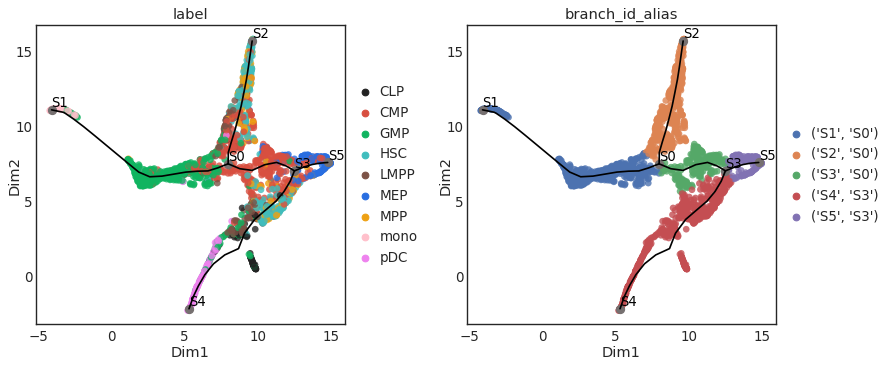

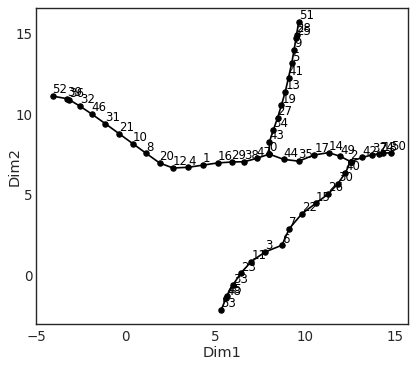

In [42]:
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label','branch_id_alias'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

S2 - старт HSC. Поэтому берем его

Importing precomputed umap visualization ...


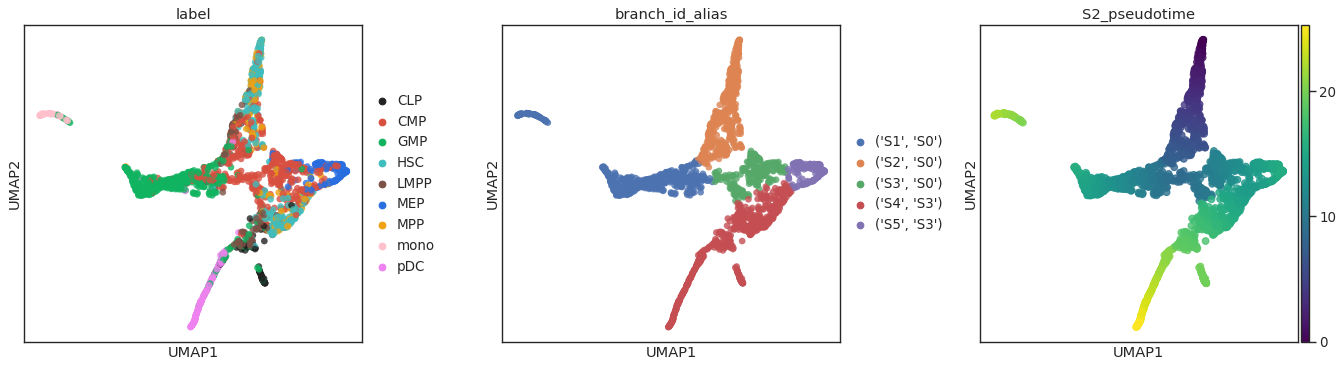

In [43]:
st.plot_visualization_2D(adata,n_neighbors=100,color=['label','branch_id_alias','S2_pseudotime'])

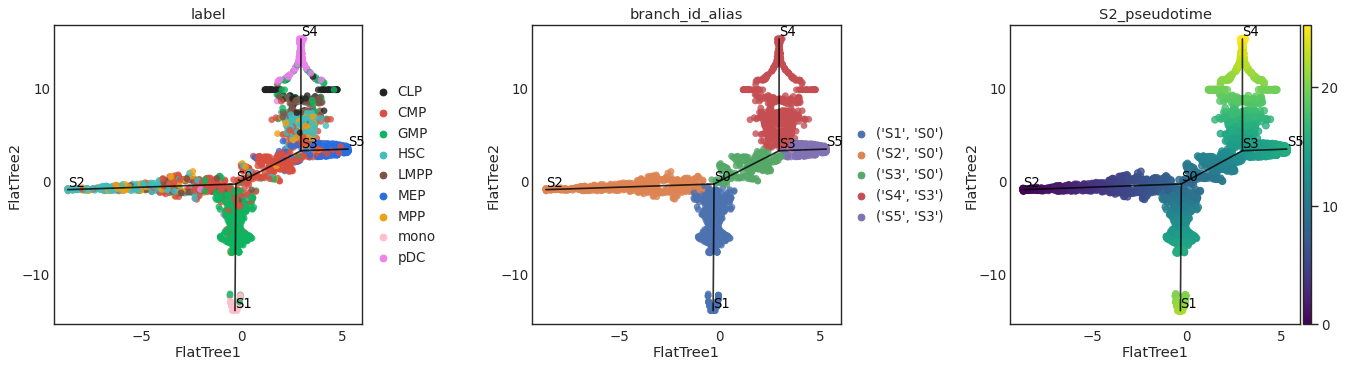

In [44]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S2_pseudotime'],
                  dist_scale=1,show_graph=True,show_text=True)

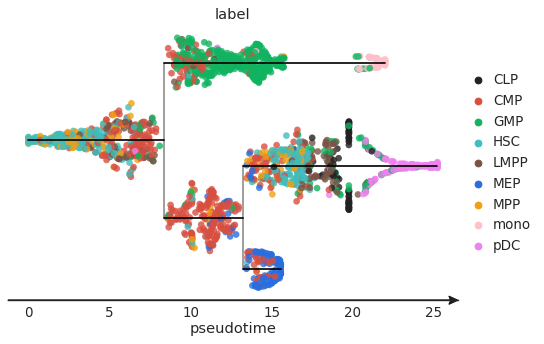

In [69]:
st.plot_stream_sc(adata,root='S2',color=['label'],
                  dist_scale=0.5,show_graph=True,show_text=False)

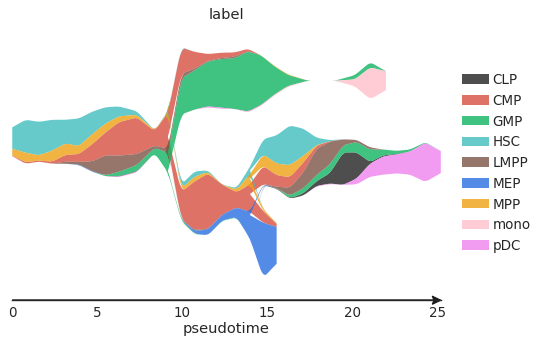

In [71]:
st.plot_stream(adata,root='S2',color=['label'],factor_min_win=1.5)

In [72]:
st.detect_leaf_markers(adata,root='S2')

Scanning all features ...
Filtering out markers that are expressed in less than 5 cells ...
1 cpus are being used ...
386 markers are being scanned ...


In [80]:
all_markers = adata.uns['leaf_markers_all']

In [88]:
for element in all_markers.index:
    print(element)

MA0477.1_FOSL1
MA0099.2_FOS::JUN
MA0489.1_JUN(var.2)
MA0491.1_JUND
MA0478.1_FOSL2
MA0501.1_MAF::NFE2
MA0490.1_JUNB
MA0476.1_FOS
MA0462.1_BATF::JUN
MA0841.1_NFE2
MA0102.3_CEBPA
MA0655.1_JDP2
MA0466.2_CEBPB
MA0837.1_CEBPE
MA0838.1_CEBPG
MA0836.1_CEBPD
MA0833.1_ATF4
MA0080.4_SPI1
MA0043.2_HLF
MA0687.1_SPIC
MA0140.2_GATA1::TAL1
MA0488.1_JUN
MA0036.2_GATA2
MA0843.1_TEF
MA0766.1_GATA5
MA0037.2_GATA3
MA0495.1_MAFF
MA0639.1_DBP
MA0136.2_ELF5
MA0496.1_MAFK
MA0081.1_SPIB
MA0653.1_IRF9
MA0025.1_NFIL3
MA0522.2_TCF3
MA0830.1_TCF4
MA0820.1_FIGLA
MA0745.1_SNAI2
MA0051.1_IRF2
MA0652.1_IRF8
MA0492.1_JUND(var.2)
MA0772.1_IRF7
MA0645.1_ETV6
MA0508.1_PRDM1
MA0103.2_ZEB1
MA0659.1_MAFG
MA0824.1_ID4
MA0640.1_ELF3
MA0598.2_EHF
MA0095.2_YY1
MA0685.1_SP4
MA0091.1_TAL1::TCF3
MA0665.1_MSC
MA0528.1_ZNF263
MA0667.1_MYF6
MA0060.2_NFYA
MA0149.1_EWSR1-FLI1
MA0748.1_YY2
MA0502.1_NFYB
MA0119.1_NFIC::TLX1
MA0056.1_MZF1
MA0641.1_ELF4
MA0048.2_NHLH1
MA0258.2_ESR2
MA0743.1_SCRT1
MA0497.1_MEF2C
MA0052.3_MEF2A
MA0842.1_NRL
MA

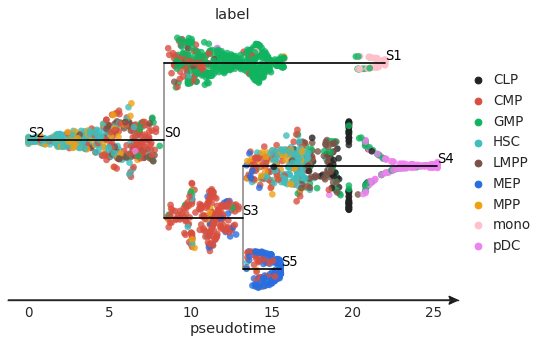

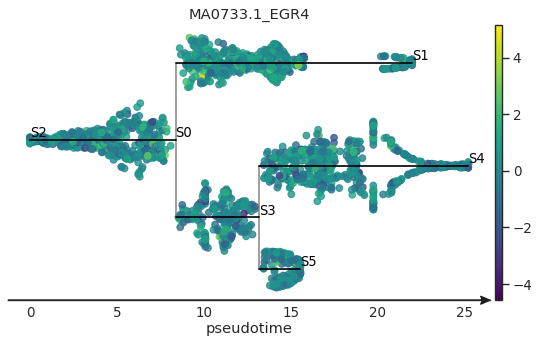

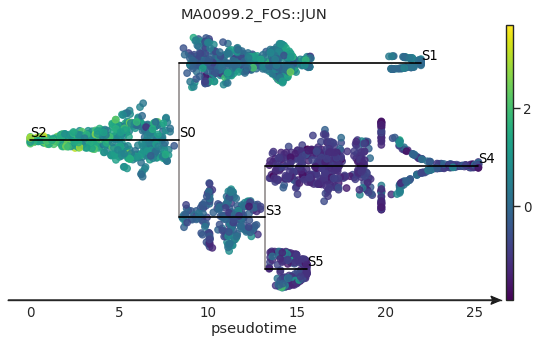

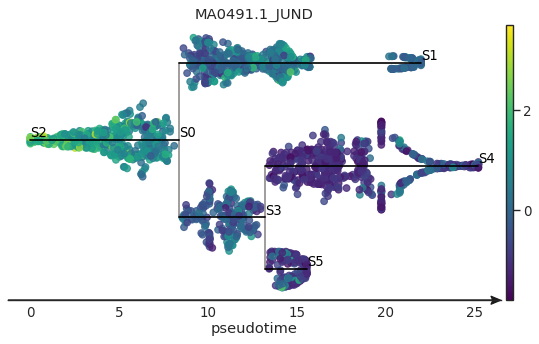

In [83]:
st.plot_stream_sc(adata,root='S2',color=['label','MA0733.1_EGR4','MA0099.2_FOS::JUN', 'MA0491.1_JUND'],
                  dist_scale=0.5,show_graph=True,show_text=True)

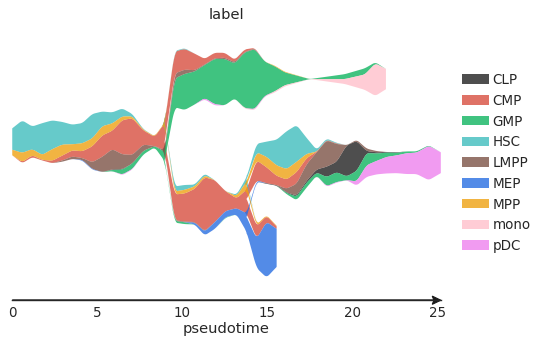

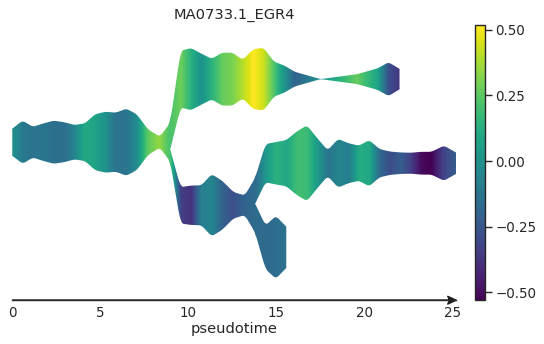

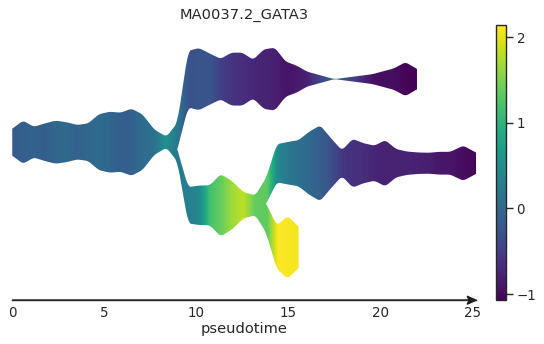

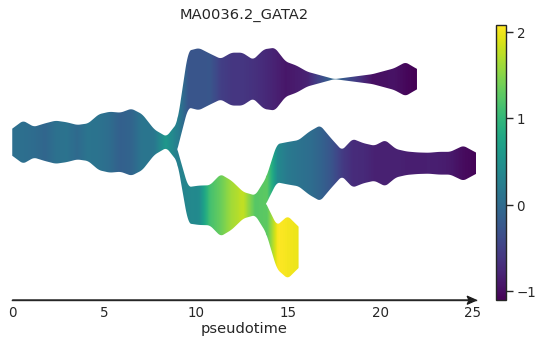

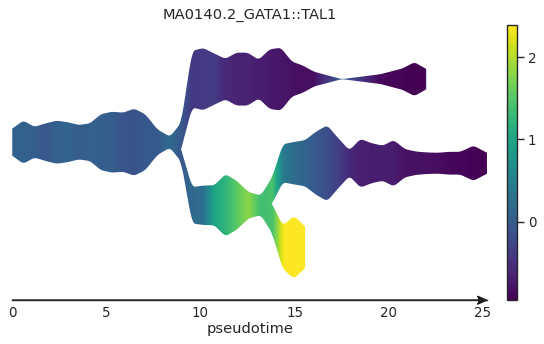

In [90]:
st.plot_stream(adata,root='S2',color=['label','MA0733.1_EGR4','MA0037.2_GATA3','MA0036.2_GATA2','MA0140.2_GATA1::TAL1'])